<a href="https://colab.research.google.com/github/IT21177682/DCE-practical-test/blob/main/Review_nlp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install swifter

In [ ]:
import json
import os

import pandas as  pd
import spacy

import seaborn as sns
import string

from tqdm import tqdm
from textblob import TextBlob

from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import swifter
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('new review.csv', encoding='latin-1')

In [ ]:
data.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,5034.0,on 08/10/18 21:29 PM (PDT),Kirsten,2018 Toyota Corolla iM Hatchback 4dr Hatchback...,What a Car,"I had previously had a 2001 Corolla, yep 17yr...",5.0
1,5035.0,on 06/24/18 15:58 PM (PDT),LORETTA,2018 Toyota Corolla iM Hatchback 4dr Hatchback...,Love my ride,Love the ride of this little guy but when you...,5.0
2,5036.0,on 01/22/18 05:15 AM (PST),Matthew,2018 Toyota Corolla iM Hatchback 4dr Hatchback...,iM Hatch AKA Scion iM,I bought my Scion iM the week Toyota said it ...,5.0
3,5037.0,on 05/30/18 15:04 PM (PDT),Bill Vandermar,2017 Toyota Corolla iM Hatchback 4dr Hatchback...,my second toyota,In my humble opinion toyota has come way down...,4.0
4,5038.0,on 04/03/18 18:48 PM (PDT),Kevin,2017 Toyota Corolla iM Hatchback 4dr Hatchback...,What a Lemon,I bought this new 5/17 with a 6 speed manual....,2.0


In [ ]:
data.shape

(3001, 7)

In [ ]:
data['Rating'].value_counts()

,count
Rating,
5.000,989
4.000,336
4.500,178
4.875,176
4.750,171
4.625,135
3.000,125
4.375,105
2.000,88


In [ ]:
def ratings_fix(value):
    if value>4.5:
        res=5
    elif value==3.5:
        res=4
    elif value==2.5:
        res=2
    elif value==1.5:
        res=2
    else:
        res=1

    return res

In [ ]:
data['Rating'] = data['Rating'].apply(ratings_fix)

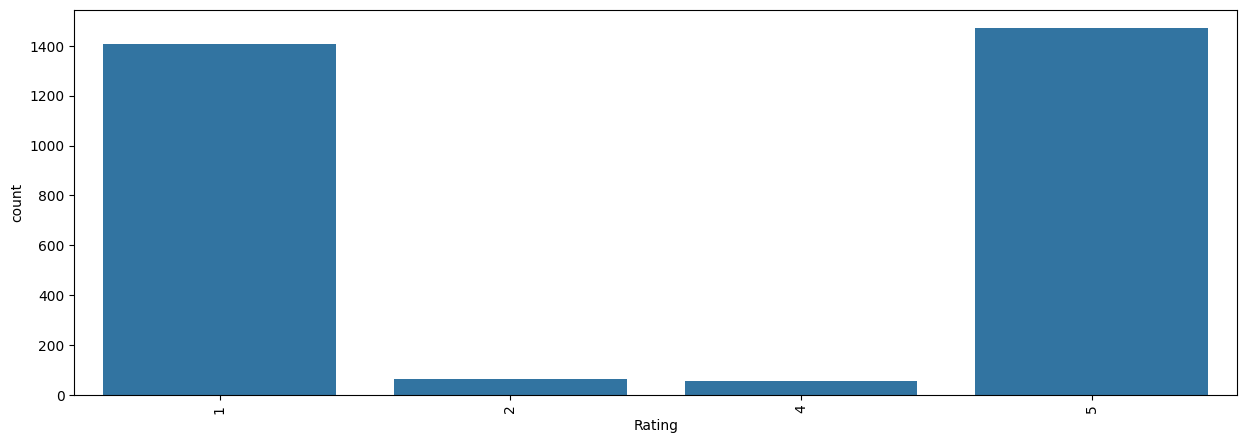

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='Rating')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2601 non-null   float64
 1   Review_Date    3001 non-null   object 
 2   Author_Name    3001 non-null   object 
 3   Vehicle_Title  3001 non-null   object 
 4   Review_Title   2601 non-null   object 
 5   Review         3001 non-null   object 
 6   Rating         3001 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 164.2+ KB


In [ ]:
data['Review'] = data['Review'].astype(str)

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
cleanResume("hello $$% world @@ new ^^ vehicle ..fff")

'hello world new vehicle fff'

In [ ]:
data['Review'] = data['Review'].apply(lambda x: cleanResume(x))

In [ ]:
X = data['Review']
y = data['Rating']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [ ]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [ ]:
text_clf.fit(X_train.to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [ ]:
y_pred = text_clf.predict(X_test.to_list())

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.65      0.64       345
           2       1.00      0.64      0.78        14
           4       1.00      0.69      0.82        13
           5       0.68      0.69      0.68       379

    accuracy                           0.67       751
   macro avg       0.83      0.67      0.73       751
weighted avg       0.67      0.67      0.67       751



In [ ]:
import pickle
pickle.dump(text_clf, open("nlp_model.dat", "wb"))

In [ ]:
with open('nlp_model.dat' , 'rb') as f:
    model = pickle.load(f)

In [ ]:
sample_text = ["I had previously had a 2001 Corolla"]

In [ ]:
model.predict(sample_text)[0]

1

In [ ]:
def predict(text):
    value = model.predict([text])
    return "Rating: " + str(value[0])

In [ ]:
import ipywidgets as widgets
text_area = widgets.Textarea(
    value="Type your text here...",
    placeholder="Enter a sentence or paragraph...",
    description="Text:",
    layout=widgets.Layout(width="500px", height="100px"),
)

button = widgets.Button(description="Predict")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        prediction = predict(text_area.value)
        print(f"Prediction: {prediction}")

button.on_click(on_button_click)

In [ ]:
display(text_area, button, output)

Textarea(value='Type your text here...', description='Text:', layout=Layout(height='100px', width='500px'), pl…

Button(description='Predict', style=ButtonStyle())

Output()